In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
from scipy.stats import skew 
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')


['house_price_advanced_view.ipynb', 'submission.csv', 'house_price_advanced_models.ipynb', 'my_model_submission.csv1', 'my_model_submission4.csv', 'house_price', 'Day1.ipynb', 'titanic', 'house-prices-advanced-regression-techniques.zip', 'titanic.zip', 'my_model_submission3.csv', 'my_model_submission0.csv', 'Day2 Housing Price.ipynb', 'house_price_competition_view.ipynb', 'my_model_submission.csv', 'my_model_submission1.csv', 'house_price_view.ipynb', 'home-data-for-ml-course.zip', '.ipynb_checkpoints', 'home-data-for-ml-course', 'house_price.ipynb', 'my_model_submission2.csv']


In [2]:
train = pd.read_csv('house_price/dataset.csv')
test = pd.read_csv('house_price/test.csv')
print ("Data is loaded!")

Data is loaded!


In [3]:
print ("Train: ",train.shape[0],"sales, and ",train.shape[1],"features")
print ("Test: ",test.shape[0],"sales, and ",test.shape[1],"features")

Train:  200000 sales, and  47 features
Test:  200000 sales, and  46 features


In [4]:
train.shape

(200000, 47)

In [5]:
train.head()

id   sale_date  sale_price  sale_nbr sale_warning join_status  join_year  \
0   0  2014-11-15      236000       2.0                    nochg       2025   
1   1  1999-01-15      313300       NaN          26        nochg       2025   
2   2  2006-08-15      341000       1.0                    nochg       2025   
3   3  1999-12-15      267000       1.0                    nochg       2025   
4   4  2018-07-15     1650000       2.0                   miss99       2025   

   latitude  longitude  area  ... view_olympics view_cascades  \
0   47.2917  -122.3658    53  ...             0             0   
1   47.6531  -122.1996    74  ...             0             0   
2   47.4733  -122.1901    30  ...             0             0   
3   47.4739  -122.3295    96  ...             0             0   
4   47.7516  -122.1222    36  ...             0             0   

  view_territorial  view_skyline  view_sound  view_lakewash  view_lakesamm  \
0                0             0           0              0              0   
1                0             0           0              1              0   
2                0             0           0              0              0   
3                0             0           0              0              0   
4                0             0           0              0              0   

   view_otherwater  view_other  submarket  
0                0           0          I  
1                0           0          Q  
2                0           0          K  
3                0           0          G  
4                0           0          P  

[5 rows x 47 columns]

In [6]:
test.head()

id   sale_date  sale_nbr sale_warning    join_status  join_year  \
0  200000  2022-12-15       4.0                         new       2025   
1  200001  2000-10-15       2.0                         new       2025   
2  200002  2004-06-15       1.0                       nochg       2025   
3  200003  2009-11-15       1.0                       nochg       2025   
4  200004  1999-06-15       1.0               reno - before       1999   

   latitude  longitude  area         city  ... view_olympics view_cascades  \
0   47.4794  -122.2212    25       RENTON  ...             0             0   
1   47.5778  -122.0270    69    SAMMAMISH  ...             0             0   
2   47.5632  -122.1623    31     BELLEVUE  ...             3             0   
3   47.6911  -122.3469     6      SEATTLE  ...             0             0   
4   47.4001  -122.4146   100  KING COUNTY  ...             0             2   

   view_territorial  view_skyline  view_sound  view_lakewash  view_lakesamm  \
0                 0             0           0              0              0   
1                 0             0           0              0              0   
2                 3             3           0              2              0   
3                 0             0           0              0              0   
4                 4             0           3              0              0   

   view_otherwater  view_other  submarket  
0                0           0          J  
1                0           0          O  
2                0           0          R  
3                0           0          B  
4                0           0          H  

[5 rows x 46 columns]

In [7]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('sale_price')
quantitative.remove('id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [8]:
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing

id                      0
sale_date               0
sale_price              0
sale_nbr            42182
sale_warning            0
join_status             0
join_year               0
latitude                0
longitude               0
area                    0
city                    0
zoning                  0
subdivision         17550
present_use             0
land_val                0
imp_val                 0
year_built              0
year_reno               0
sqft_lot                0
sqft                    0
sqft_1                  0
sqft_fbsmt              0
grade                   0
fbsmt_grade             0
condition               0
stories                 0
beds                    0
bath_full               0
bath_3qtr               0
bath_half               0
garb_sqft               0
gara_sqft               0
wfnt                    0
golf                    0
greenbelt               0
noise_traffic           0
view_rainier            0
view_olympics           0
view_cascade

In [9]:
missing = missing[missing > 0]
missing

sale_nbr       42182
subdivision    17550
submarket       1717
dtype: int64

<Axes: >

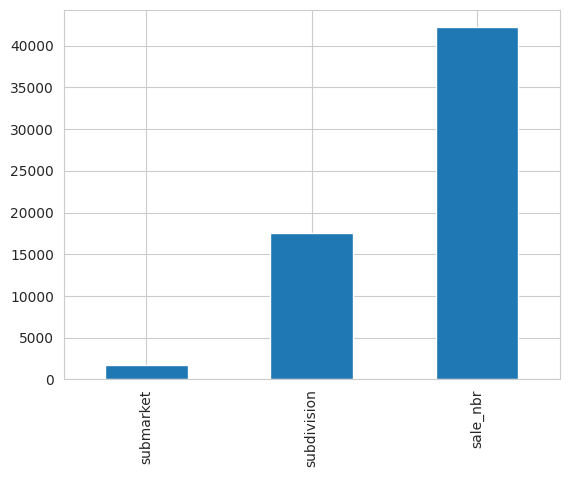

In [10]:
missing.sort_values(inplace=True)
missing.plot.bar()

<Axes: title={'center': 'Log Normal'}, xlabel='sale_price'>

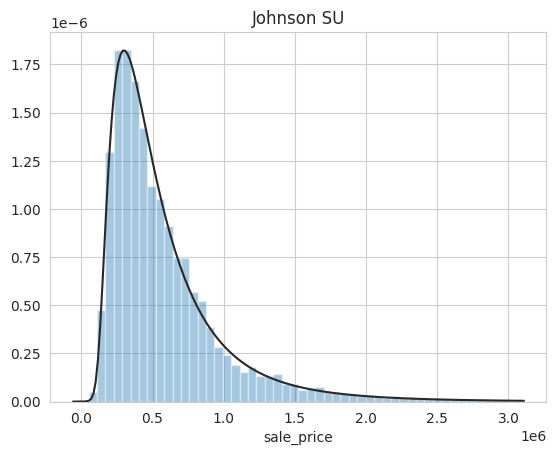

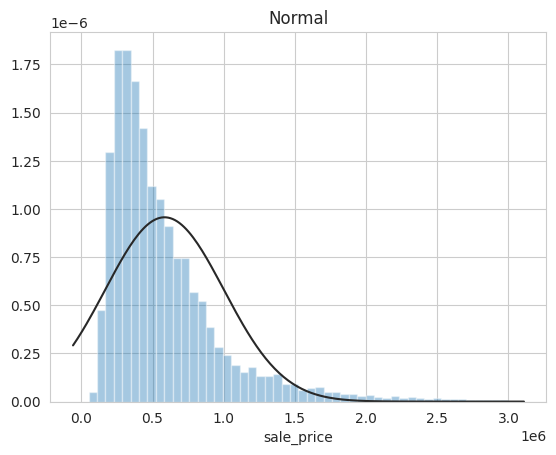

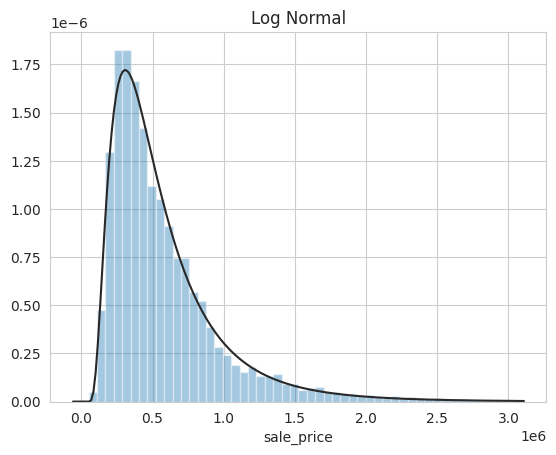

In [11]:
y = train['sale_price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

In [12]:
# shapiro-wilk test 正态性检验方法，常用，准确性高，适合小样本量
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


In [13]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'sale_price']].groupby(feature).mean()['sale_price']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['sale_date_E', 'sale_warning_E', 'join_status_E', 'city_E', 'zoning_E', 'subdivision_E', 'submarket_E']


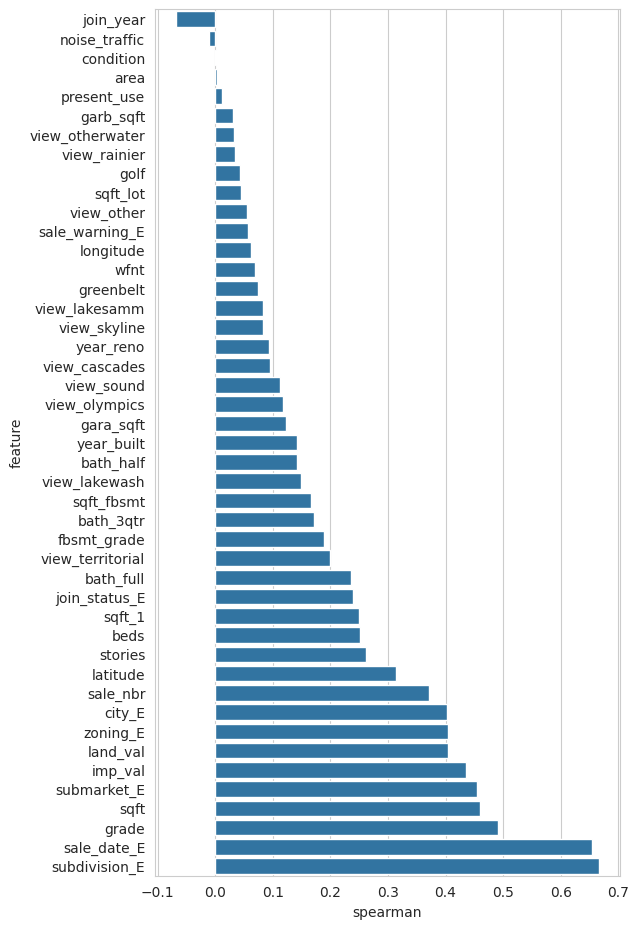

In [16]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['sale_price'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(train, features)

<Axes: >

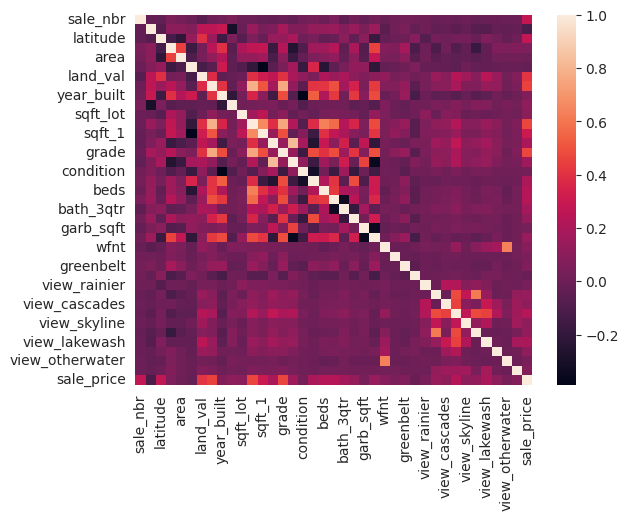

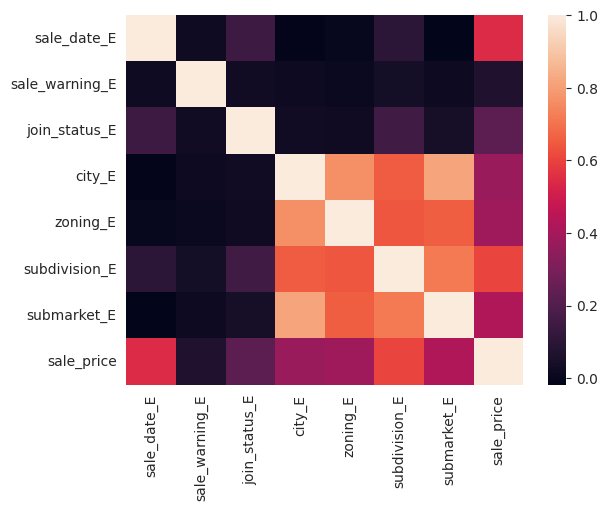

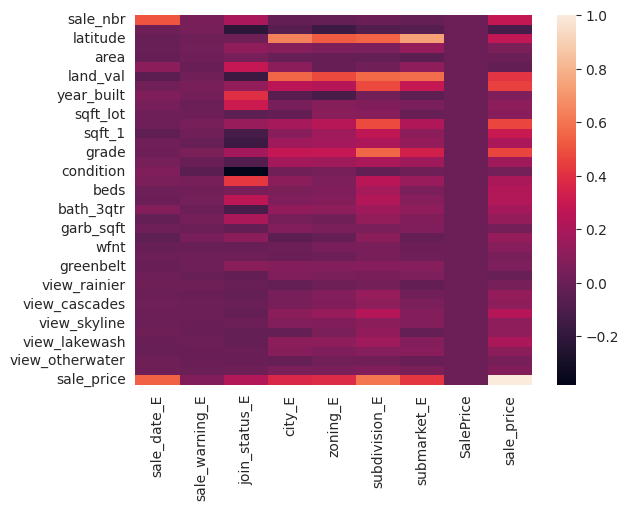

In [17]:
plt.figure(1)
corr = train[quantitative+['sale_price']].corr()
sns.heatmap(corr)
plt.figure(2)
corr = train[qual_encoded+['sale_price']].corr()
sns.heatmap(corr)
plt.figure(3)
# 设置空矩阵，用来存放相关系数值
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['sale_price'], columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['sale_price']:
    for q2 in qual_encoded+['sale_price']:
        # 将相关系数存在刚才的空矩阵指定位置，df.loc['row_label1', 'row_label2'] 
        corr.loc[q1, q2] = train[q1].corr(train[q2])
sns.heatmap(corr)

In [20]:
import umap.umap_ as umap
features = quantitative + qual_encoded
X = train[features].fillna(0.).values
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42, n_jobs=-1)
X_umap = reducer.fit_transform(X_pca)

In [22]:
import joblib

# 保存模型或结果
joblib.dump(pca, 'pca_model.pkl')
joblib.dump(reducer, 'umap_model.pkl')
joblib.dump(X_umap, 'X_umap.npy')


['X_umap.npy']

In [ ]:
# 加载模型或结果
pca = joblib.load('pca_model.pkl')
reducer = joblib.load('umap_model.pkl')
X_umap = joblib.load('X_umap.npy')


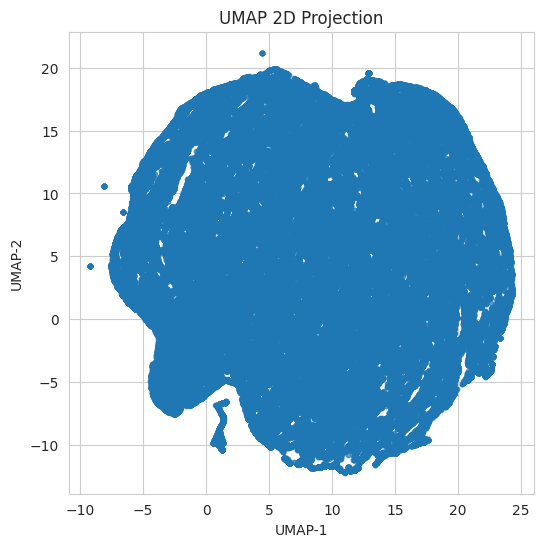

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=10, alpha=0.7)
plt.title("UMAP 2D Projection")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()



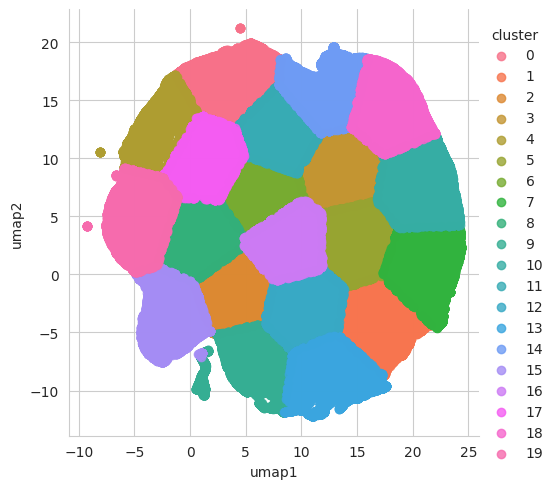

In [23]:
X_kmeans = KMeans(n_clusters=20, random_state=0)
X_kmeans.fit(X_umap)
fr = pd.DataFrame({'umap1': X_umap[:,0], 'umap2': X_umap[:, 1], 'cluster': X_kmeans.labels_})
sns.lmplot(data=fr, x='umap1', y='umap2', hue='cluster', fit_reg=False)

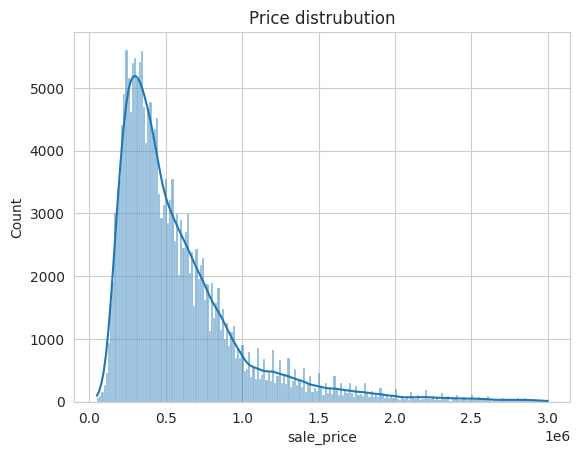

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['sale_price'], kde=True)
plt.title("Price distrubution")
plt.show()



In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

df = train
# 合并城市 + subdivision 做原始地址字符串
addresses = df['city'].fillna('') + ' ' + df['subdivision'].fillna('')

# TF-IDF 特征（可以控制 max_features 降维）
vectorizer = TfidfVectorizer(max_features=300, stop_words='english')
address_vecs = vectorizer.fit_transform(addresses)


In [30]:
# 每个 subdivision 的平均价格
price_mean = df.groupby('subdivision')['sale_price'].mean()
df['sub_price_mean'] = df['subdivision'].map(price_mean)

# 标准化后并入地址向量
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
price_scaled = scaler.fit_transform(df[['sub_price_mean']].fillna(0))

# 拼接
from scipy.sparse import hstack
X_cluster_input = hstack([address_vecs, price_scaled])


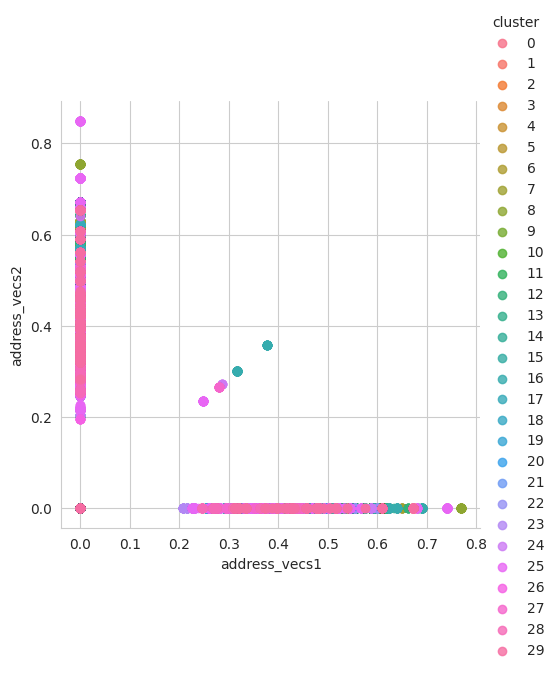

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=30, random_state=42)
df['addr_cluster'] = kmeans.fit_predict(address_vecs)
vecs_dense = address_vecs.toarray() 
fr = pd.DataFrame({'address_vecs1': vecs_dense[:,0], 'address_vecs2': vecs_dense[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='address_vecs1', y='address_vecs2', hue='cluster', fit_reg=False)

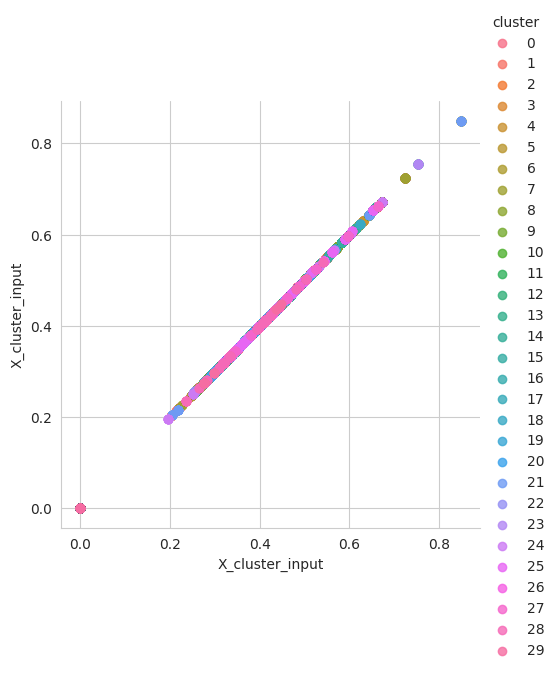

In [34]:
kmeans = KMeans(n_clusters=30, random_state=42)
df['addr_cluster1'] = kmeans.fit_predict(X_cluster_input)
X_cluster_input1 = X_cluster_input.toarray() 
fr1 = pd.DataFrame({'X_cluster_input': X_cluster_input1[:,0], 'X_cluster_input': X_cluster_input1[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr1, x='X_cluster_input', y='X_cluster_input', hue='cluster', fit_reg=False)

In [35]:
df

id   sale_date  sale_price  sale_nbr sale_warning join_status  \
0            0  2014-11-15      236000       2.0                    nochg   
1            1  1999-01-15      313300       NaN          26        nochg   
2            2  2006-08-15      341000       1.0                    nochg   
3            3  1999-12-15      267000       1.0                    nochg   
4            4  2018-07-15     1650000       2.0                   miss99   
...        ...         ...         ...       ...          ...         ...   
199995  199995  2000-08-15      277500       1.0                    nochg   
199996  199996  2019-07-15     1296000       2.0                      new   
199997  199997  2018-06-15      845000       2.0                      new   
199998  199998  2018-06-15      890000       2.0                    nochg   
199999  199999  2024-06-15      799000       NaN                      new   

        join_year  latitude  longitude  area  ... sale_date_E sale_warning_E  \
0            2025   47.2917  -122.3658    53  ...       183.0           89.0   
1            2025   47.6531  -122.1996    74  ...         6.0           81.0   
2            2025   47.4733  -122.1901    30  ...       147.0           89.0   
3            2025   47.4739  -122.3295    96  ...         1.0           89.0   
4            2025   47.7516  -122.1222    36  ...       242.0           89.0   
...           ...       ...        ...   ...  ...         ...            ...   
199995       2025   47.5503  -122.0285    69  ...        20.0           89.0   
199996       2025   47.6789  -122.1164    72  ...       244.0           89.0   
199997       2025   47.6939  -122.3542     6  ...       253.0           89.0   
199998       2025   47.6433  -122.0613    35  ...       253.0           89.0   
199999       2025   47.5806  -122.3881    48  ...       309.0           89.0   

       join_status_E  city_E  zoning_E  subdivision_E  submarket_E  \
0                3.0     6.0     132.0         1328.0          2.0   
1                3.0    31.0     420.0         5735.0         14.0   
2                3.0    16.0     189.0         1921.0          6.0   
3                3.0    14.0     128.0         2235.0          4.0   
4                5.0    21.0     347.0         9509.0         15.0   
...              ...     ...       ...            ...          ...   
199995           3.0    32.0     400.0         8255.0         16.0   
199996           6.0    30.0     357.0         9332.0         15.0   
199997           6.0    26.0     298.0         6262.0         12.0   
199998           3.0    33.0     351.0         8086.0         16.0   
199999           6.0    26.0     298.0         6210.0          9.0   

        sub_price_mean  addr_cluster  addr_cluster1  
0         3.030885e+05             9             20  
1         5.447667e+05            29             25  
2         3.308887e+05             6             13  
3         3.452000e+05            11              0  
4         1.104400e+06            12              7  
...                ...           ...            ...  
199995    7.952630e+05            22              1  
199996    1.043100e+06             7              7  
199997    5.838518e+05             0              8  
199998    7.710851e+05             5              1  
199999    5.791611e+05             1              8  

[200000 rows x 57 columns]

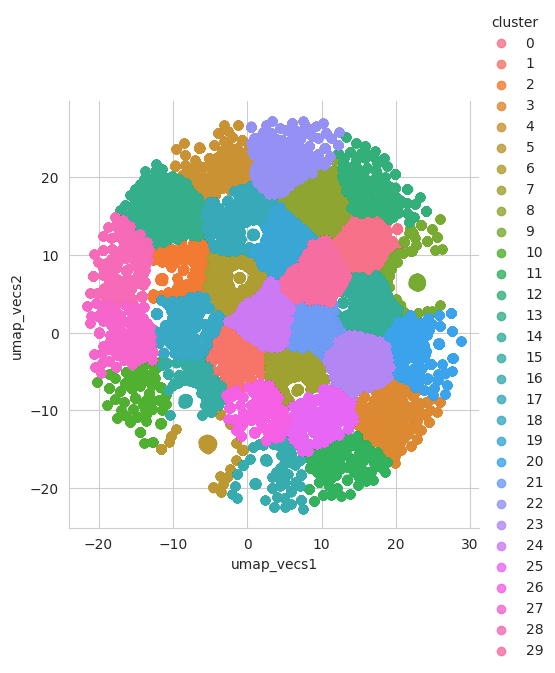

In [39]:
# 降维
umap_vecs = umap.UMAP(n_components=2, random_state=42).fit_transform(address_vecs)

# 聚类
kmeans = KMeans(n_clusters=30, random_state=42)
labels = kmeans.fit_predict(umap_vecs)

# 加入 DataFrame 可视化
df['addr_cluster'] = labels
fr = pd.DataFrame({'umap_vecs1': umap_vecs[:,0], 'umap_vecs2': umap_vecs[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='umap_vecs1', y='umap_vecs2', hue='cluster', fit_reg=False)



In [40]:
joblib.dump(vectorizer, 'addr_tfidf.pkl')
joblib.dump(reducer, 'addr_umap.pkl')
joblib.dump(kmeans, 'addr_kmeans.pkl')
print('Finished')

Finished


In [41]:
for c in range(30):
    print(f"Cluster {c}")
    idx = np.where(labels == c)[0][:5]  # 每簇取前 5 个
    print(addresses.iloc[idx].values)
    print("-" * 30)


Cluster 0
['RENTON FALCON RIDGE (CEDAR RIDGE)'
 'AUBURN HILLMANS CD AUBURNDALE DIV NO. 02'
 'KING COUNTY TRILOGY AT REDMOND RIDGE DIV 10'
 'KING COUNTY FAIRWOOD PARK DIV NO. 01' 'KING COUNTY REDMOND RIDGE DIV 2']
------------------------------
Cluster 1
['SEATTLE BEACON HILL VIEW ADD' 'SEATTLE CARLETON PARK'
 'SEATTLE CARLETON BEACH TRACTS' 'SEATTLE WEBSTERS MADISON ST ADD'
 'SHORELINE CLARKSON ADD']
------------------------------
Cluster 2
['ISSAQUAH ISSAQUAH HIGHLANDS DIVS 63 AND 69' 'KENT PHEASANTS HOLLOW'
 'RENTON MARTINS ACRE TRS' 'KENT SUNNFJORD' 'AUBURN CROFTON TOWNHOMES']
------------------------------
Cluster 3
['KING COUNTY BALCHS ALBERT PANORAMA VIEW NO. 02'
 'BURIEN CORMODES 5-ACRE GARDEN TRS' 'SEATTLE BUENA VISTA ADD NO. 02'
 'RENTON RENTON FARM PLAT NO. 04' 'REDMOND WILLOWMERE PARK']
------------------------------
Cluster 4
['FEDERAL WAY WEST CAMPUS DIV NO. 04' 'SAMMAMISH INGLEWOOD GLEN'
 'FEDERAL WAY ' 'FEDERAL WAY VILLAGE PARK DIV B'
 'FEDERAL WAY CAMPUS HIGHLANDS DIV N

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
import umap, hdbscan

# 地址字符串（city + subdivision）
addresses = (df['city'].fillna('') + ' ' + df['subdivision'].fillna('')).str.lower()

# 向量化
vec = TfidfVectorizer(max_features=500, stop_words='english')
X_text = vec.fit_transform(addresses)

# 降维
X_umap = umap.UMAP(
    n_neighbors=10,       
    min_dist=0.1,          
    n_components=5,       
    metric='cosine',        
    random_state=42
).fit_transform(X_text)

# 聚类
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=20,       
    min_samples=5,           
    cluster_selection_epsilon=0.1
)

labels = clusterer.fit_predict(X_umap)

# 构建可视化 DataFrame
fr = pd.DataFrame({
    'umap1': X_umap[:, 0],
    'umap2': X_umap[:, 1],
    'cluster': labels
})

# 可视化
sns.lmplot(data=fr, x='umap1', y='umap2', hue='cluster', fit_reg=False, legend=True, height=6)


KeyboardInterrupt: 

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=fr,
    x='umap1', y='umap2',
    hue='cluster',
    palette='tab20',
    s=10,
    linewidth=0,
    legend='full'
)
plt.title("HDBSCAN Clustering on Address TF-IDF + UMAP")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


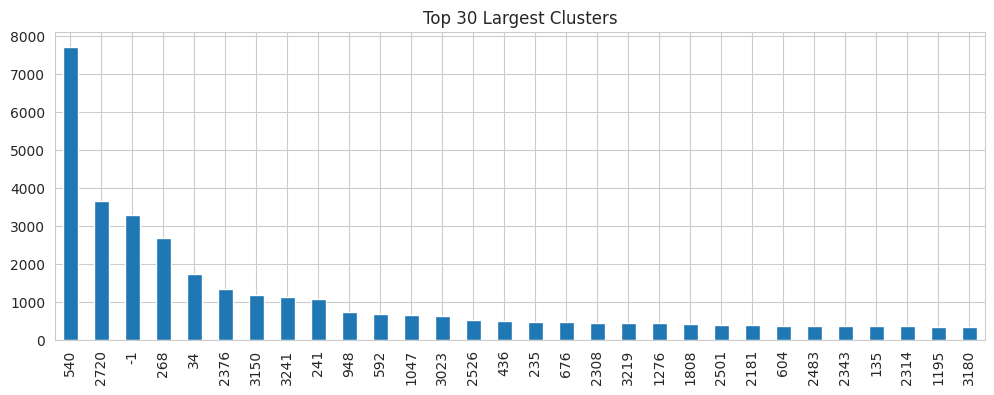

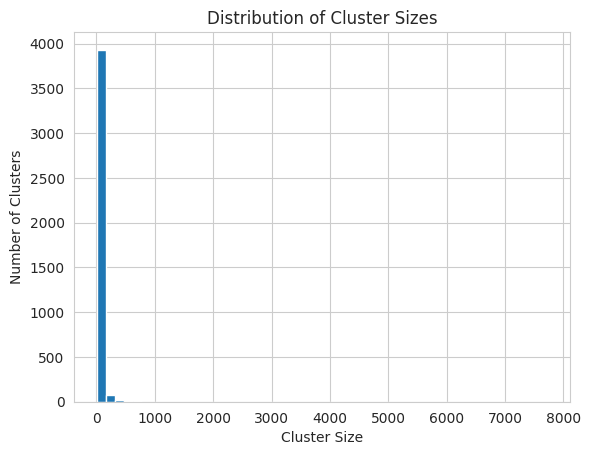

Total clusters (excluding noise): 4035
Noise samples: 3282


In [60]:
def plot_cluster_summary(cluster_labels):
    from collections import Counter

    cluster_counts = Counter(cluster_labels)
    series = pd.Series(cluster_counts)

    # Top-K
    series.sort_values(ascending=False)[:30].plot.bar(
        figsize=(12, 4), title='Top 30 Largest Clusters'
    )
    plt.show()

    # 分布图
    plt.hist(series.values, bins=50)
    plt.title("Distribution of Cluster Sizes")
    plt.xlabel("Cluster Size")
    plt.ylabel("Number of Clusters")
    plt.show()

    print(f"Total clusters (excluding noise): {(series.index != -1).sum()}")
    print(f"Noise samples: {series[-1] if -1 in series else 0}")


plot_cluster_summary(labels)


In [ ]:
df['addr_cluster'] = labels.astype(str)  # 转成字符串以便 one-hot 或 label encode
# 每个聚类内，房价均值 / 房屋面积中位数 等
cluster_stats = df.groupby('addr_cluster')['sale_price'].agg(['mean', 'std', 'median']).rename(columns={
    'mean': 'cluster_price_mean',
    'std': 'cluster_price_std',
    'median': 'cluster_price_median'
})
df = df.join(cluster_stats, on='addr_cluster')
